In [1]:
crystals   = "caf baf qtz lif mgf".split()
path       = "/home/gonzalo/data/CC/pre-annealing-experiment/sim/v3/"
filename   = "summary.h5"
nevt       = float(open(f"{path}/nevt.txt").read())
activity   = 0.5 * 1e-3 * 3.7e10
t          = 4 * 3600 + 15 * 60
t          = 1*24*3600
t          = 2*24*3600
t          = 7*24*3600
t          = 3*24*3600
overwrite  = True
skip_plots = False

In [2]:
n_gammas_per_event = 2

density = dict( caf = 3.180
              , baf = 4.890
              , qtz = 2.320
              , lif = 2.635
              , mgf = 3.150
              )

volume = dict( caf = 0.5**3
             , baf = 0.5**3
             , qtz = 0.5**3
             , lif = 0.5**3
             , mgf = 0.5**3
             )

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from CCplot import figure
from CCplot import subplot
from CCplot import auto_plot_style

In [4]:
%matplotlib inline

%load_ext skip_cell

auto_plot_style()

In [5]:
already_processed = os.path.exists(os.path.join(path, filename))
dont_load_input   = skip_plots and already_processed
skip_processing   = already_processed and not overwrite

In [6]:
%%skip $dont_load_input
dfs = {crystal : pd.read_hdf(os.path.join(path, f"{crystal}.cc.h5"), "/MC/hits") for crystal in crystals}

In [7]:
%%skip $skip_plots

figure(5)
for i, c in enumerate(crystals, start=1):
    subplot(5, i)
    plt.hist(dfs[c].z, 21, weights=dfs[c].energy / nevt * 1e6, histtype="step")
    plt.xlabel("z (mm)")
    plt.ylabel("Energy per gamma (eV)")
    plt.title(c)

plt.tight_layout()

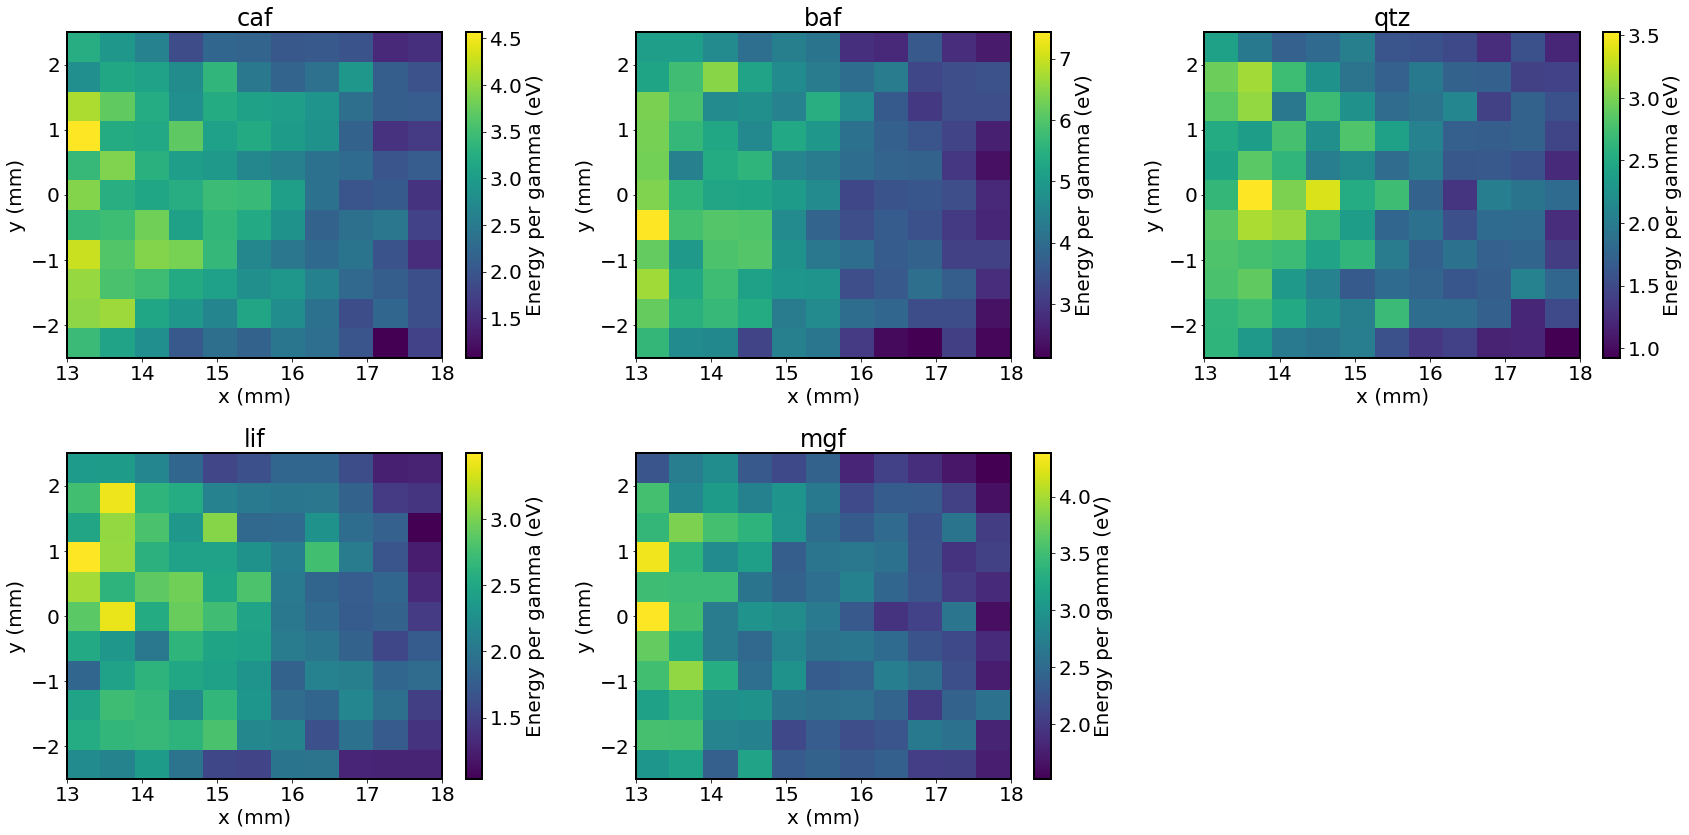

In [8]:
%%skip $skip_plots

figure(5)
for i, c in enumerate(crystals, start=1):
    subplot(5, i)
    plt.hist2d(dfs[c].x, dfs[c].y, (11, 11), weights=dfs[c].energy / nevt * 1e6)
    plt.xlabel("x (mm)")
    plt.ylabel("y (mm)")
    plt.title(c)
    plt.colorbar().set_label("Energy per gamma (eV)")
plt.tight_layout()

In [9]:
%%skip $skip_processing

summary = []
for crystal, df in dfs.items():
    mass_kg        = density[crystal] * volume[crystal] / 1e3
    deposited_e_J  = df.energy.sum() / nevt * 1e6 * 1.602e-19 
    dose_per_gamma = deposited_e_J / mass_kg
    
    summary.append(pd.DataFrame(dict( crystal        =         crystal
                                    , density        = density[crystal]
                                    , volume         = volume [crystal]
                                    , mass           = mass_kg
                                    , E_per_gamma    = deposited_e_J
                                    , dose_per_gamma = dose_per_gamma
                                    )
                               , index = [0]))

summary = pd.concat(summary, ignore_index=True, sort=False)
summary.to_hdf(os.path.join(path, filename), "/data")

In [10]:
summary = pd.read_hdf(os.path.join(path, filename), "/data")

In [11]:
summary = summary.assign(total_dose = activity * n_gammas_per_event * t * summary.dose_per_gamma)
summary

crystal  density  volume      mass   E_per_gamma  dose_per_gamma  total_dose
0     caf    3.180   0.125  0.000398  5.335962e-17    1.342380e-13    1.287396
1     baf    4.890   0.125  0.000611  8.409000e-17    1.375706e-13    1.319357
2     qtz    2.320   0.125  0.000290  3.995965e-17    1.377919e-13    1.321479
3     lif    2.635   0.125  0.000329  4.202217e-17    1.275815e-13    1.223558
4     mgf    3.150   0.125  0.000394  5.086377e-17    1.291778e-13    1.238867